In [2]:
BiocManager::install("maser")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'maser'

also installing the dependencies ‘jpeg’, ‘interp’, ‘latticeExtra’, ‘Gviz’


Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    class, cluster, foreign, KernSmooth, lattice, MASS, mgcv, nlme, nnet,
    rpart, spatial, survival
  path: /usr/local/lib/R/site-library
  packages:
    Matrix, RcppEigen, Rsamtools, SeuratObject, Signac

Old packages: 'AnnotationDbi', 'AnnotationFilter', 'askpass', 'BH', 'Biobase',
  'BiocFileCache', 'BiocGenerics', 'BiocIO', 'BiocManager', 'BiocParallel',
  'biomaRt', 'Biostrings', 'biovizBase', 'brew', 'BSgenome', 'bslib', 'cachem',
  'checkmate', 'cli', 'commonmark', 'cowplot', 'cpp11', 'crosstalk', 'curl',
  'cyc

In [3]:
library(maser)
library(rtracklayer)

Loading required package: ggplot2



Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

War

In [9]:
#Path to 468_0hours vs 468_12hours
path <- "../RMATS_results/468_0_v_468_12"

In [10]:
#Calling the Rmats file we are using
Met <- maser(path, c("MB468_0mins", "MB468_720mins"), ftype = "JCEC")
Met

A Maser object with 78717 splicing events.

Samples description: 
Label=MB468_0mins     n=3 replicates
Label=MB468_720mins     n=3 replicates

Splicing events: 
A3SS.......... 5443 events
A5SS.......... 3658 events
SE.......... 55782 events
RI.......... 3654 events
MXE.......... 10180 events

In [11]:
#head of summary of the rmats output
head(summary(Met, type = "SE")[, 1:8])

,ID,GeneID,geneSymbol,PValue,FDR,IncLevelDifference,PSI_1,PSI_2
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,6,CFAP69,CFAP69,1,1,-0.471,"NA,0.529,NA","1,1,NA"
2,11,CFAP69,CFAP69,1,1,0.182,"NA,1,NA","0.455,1,1"
3,13,CFAP69,CFAP69,1,1,0.500,"1,NA,1","0,NA,1"
4,14,MBD4,MBD4,1,1,0.002,"1,1,1","0.993,1,1"
5,15,MBD4,MBD4,1,1,0.006,"1,1,1","0.983,1,1"
6,16,MBD4,MBD4,1,1,0.001,"1,1,1","0.996,1,1"


In [12]:
Met_filt <- filterByCoverage(Met, avg_reads = 5)
#Low coverage splicing junctions are commonly found in RNA-seq data and lead to low confidence PSI levels. We can remove low coverage events using filterByCoverage(), which may signficantly reduced the number of splicing events.

In [13]:
Met_top <- topEvents(Met_filt, fdr = 0.05, deltaPSI = 0.1)
Met_top
#The function topEvents() allows to select statistically significant events given a FDR cutoff and minimum PSI change. Default values are fdr = 0.05 and deltaPSI = 0.1 (ie. 10% minimum change).


A Maser object with 1917 splicing events.

Samples description: 
Label=MB468_0mins     n=3 replicates
Label=MB468_720mins     n=3 replicates

Splicing events: 
A3SS.......... 144 events
A5SS.......... 141 events
SE.......... 1291 events
RI.......... 202 events
MXE.......... 139 events

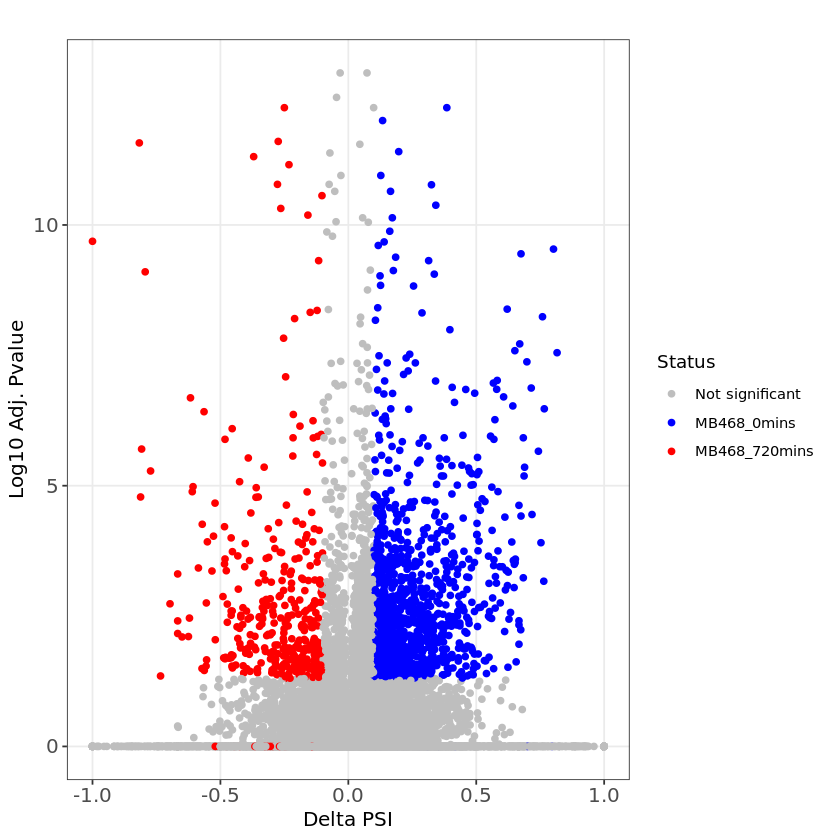

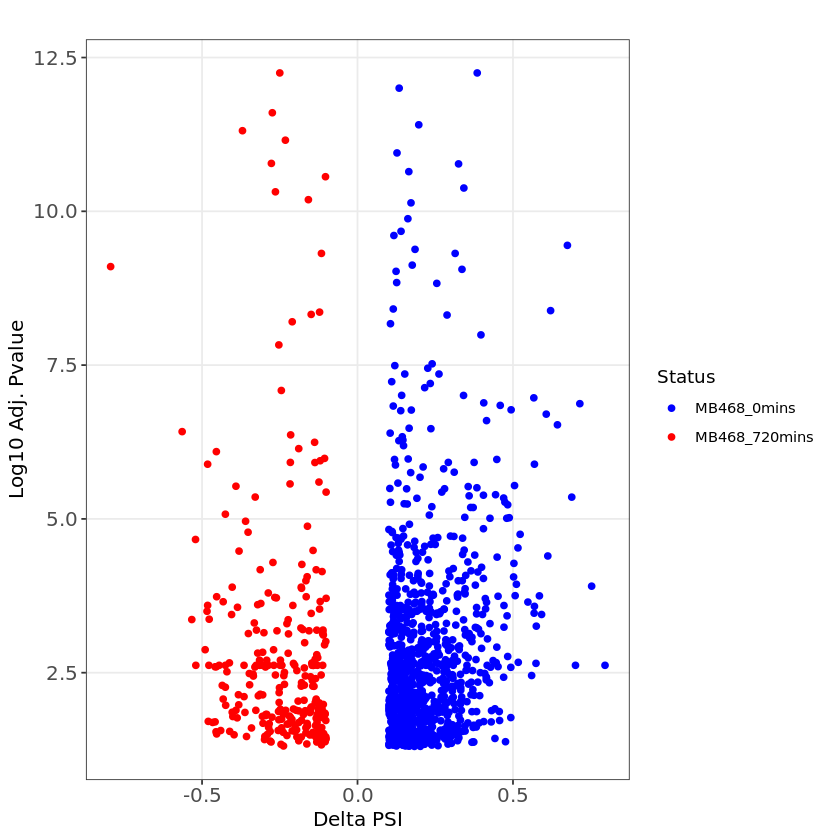

In [14]:
#An overview of significant events can be obtained using either dotplot() or volcano() functions, specifying FDR levels, minimum change in PSI between conditions and splicing type. Significant events in each condition will be highlighted.
volcano(Met, fdr = 0.05, deltaPSI = 0.1, type = "SE")
examplea <- volcano(Met_top, fdr = 0.05, deltaPSI = 0.1, type = "SE")
examplea

Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


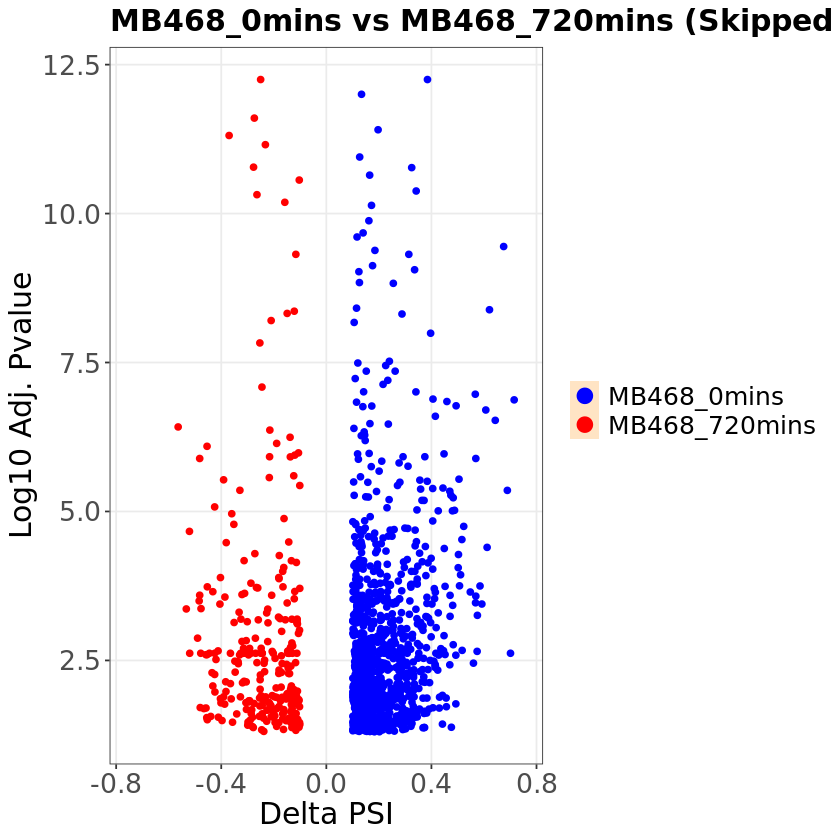

In [15]:
#theme() allows you to change aspects of the volcano plot
examplea + theme(axis.title.x = element_text(size=18)) + theme(axis.title.y = element_text(size=18))+ theme(legend.key=element_rect(fill='bisque')) + guides(colour = guide_legend(override.aes = list(size=4))) + theme(legend.text=element_text(size=15)) + theme(axis.title = element_text(size = 18)) + 
theme(legend.title=element_blank()) + theme(axis.text.x  = element_text(size=16)) + ggtitle("MB468_0mins vs MB468_720mins (Skipped Exon)") + theme(plot.title = element_text(lineheight=.8, face="bold")) + theme(axis.text.y  = element_text(size=16)) + theme(plot.title = element_text(size=18)) +
xlim(-0.75, 0.75)

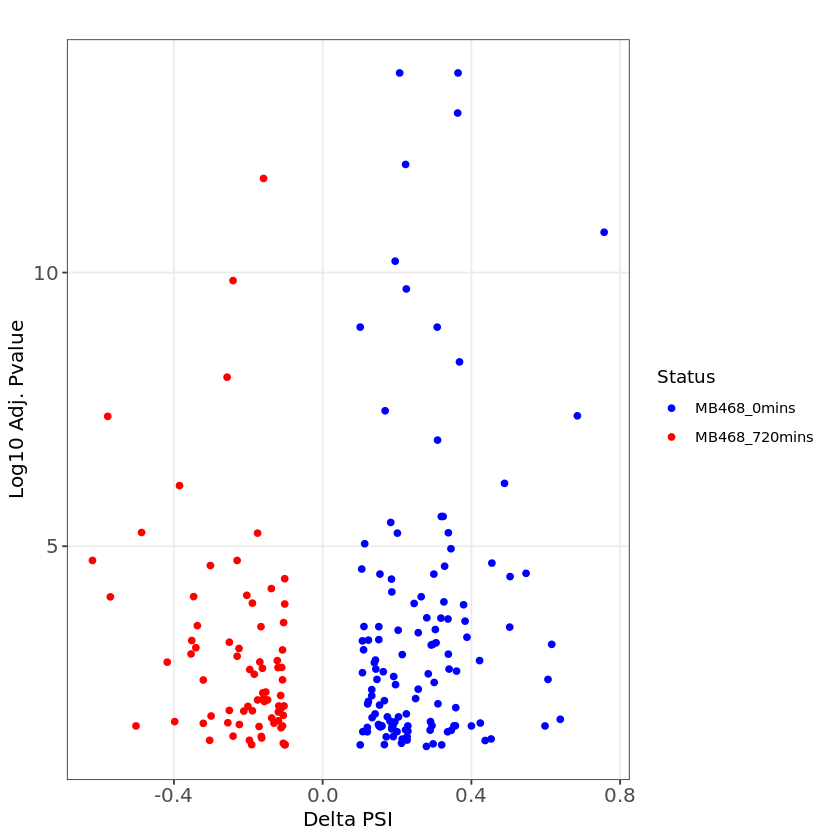

In [16]:
#If only significant events should be plotted, then use topEvents() combined with volcano() or dotplot() for visualization.
example1 <- volcano(Met_top, fdr = 0.05, deltaPSI = 0.1, type = "RI")
example1

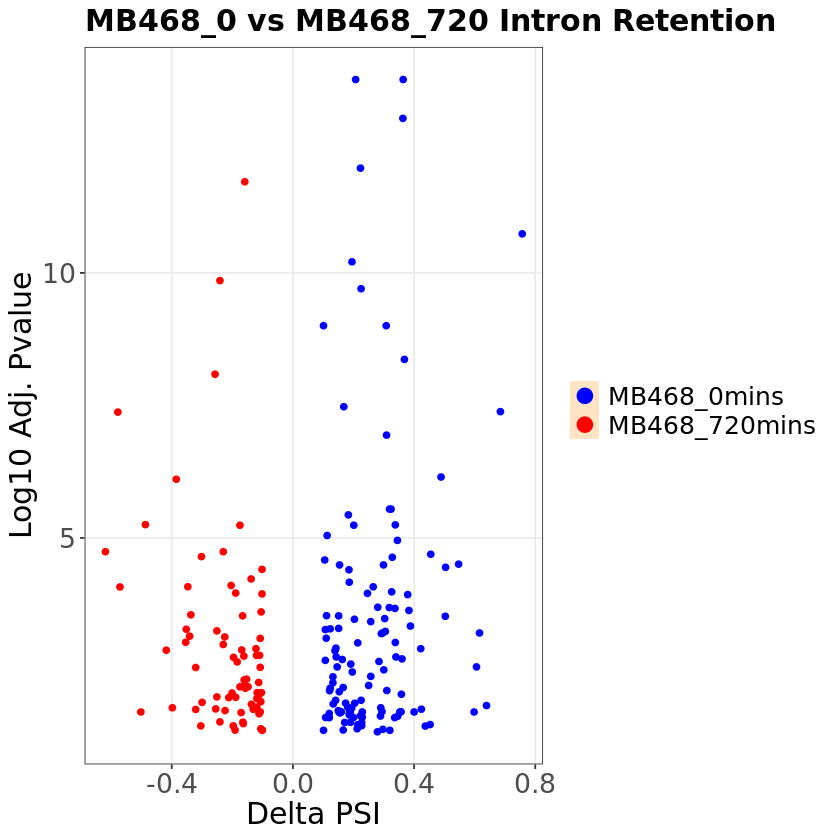

In [17]:
example1 + theme(axis.title.x = element_text(size=18)) + theme(axis.title.y = element_text(size=18))+ theme(legend.key=element_rect(fill='bisque')) + guides(colour = guide_legend(override.aes = list(size=4))) + theme(legend.text=element_text(size=15)) + theme(axis.title = element_text(size = 18)) + 
  theme(legend.title=element_blank()) + theme(axis.text.x  = element_text(size=16)) + ggtitle("MB468_0 vs MB468_720 Intron Retention") + theme(plot.title = element_text(lineheight=.8, face="bold")) + theme(axis.text.y  = element_text(size=16)) + theme(plot.title = element_text(size=18))


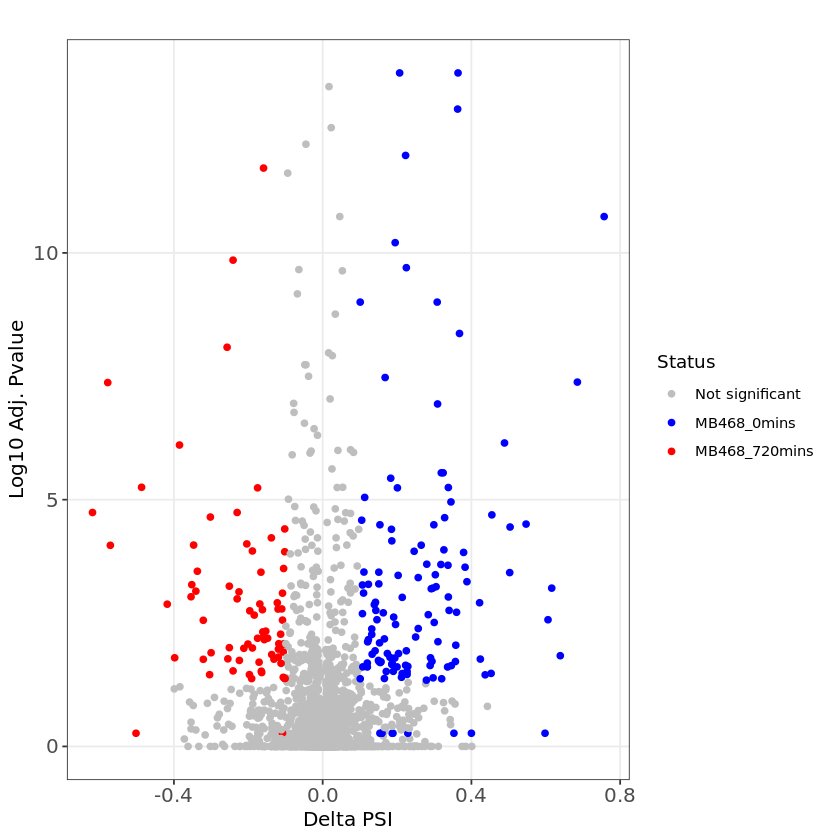

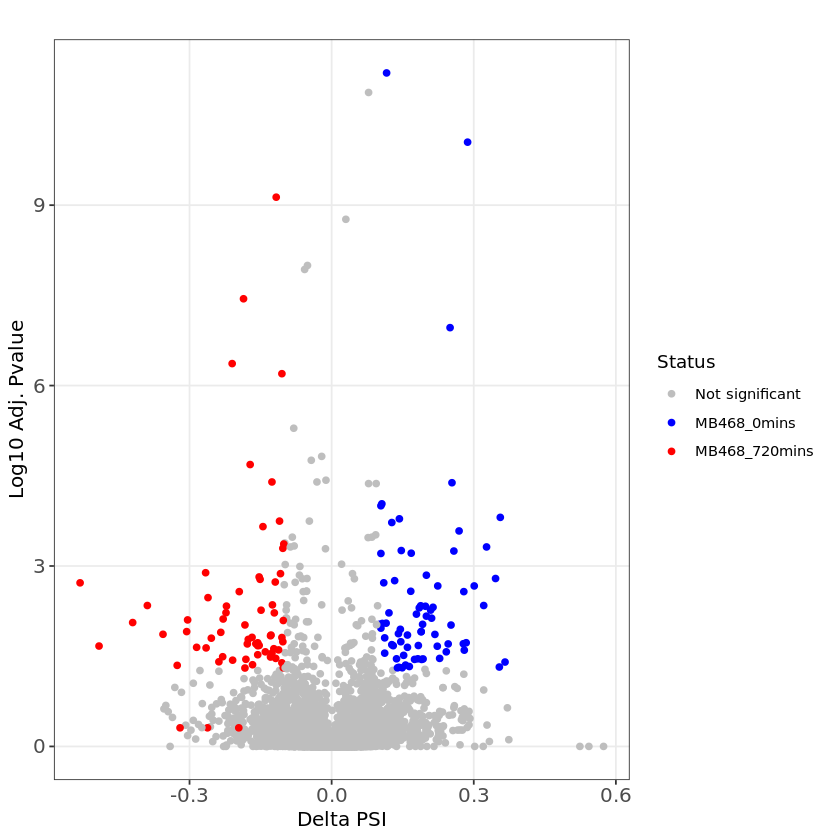

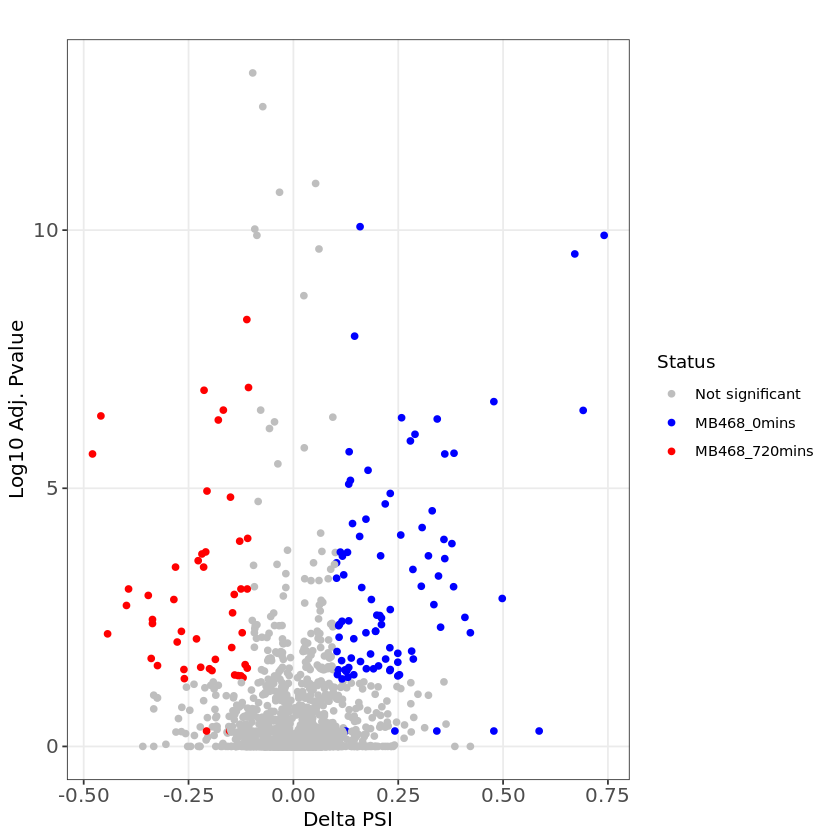

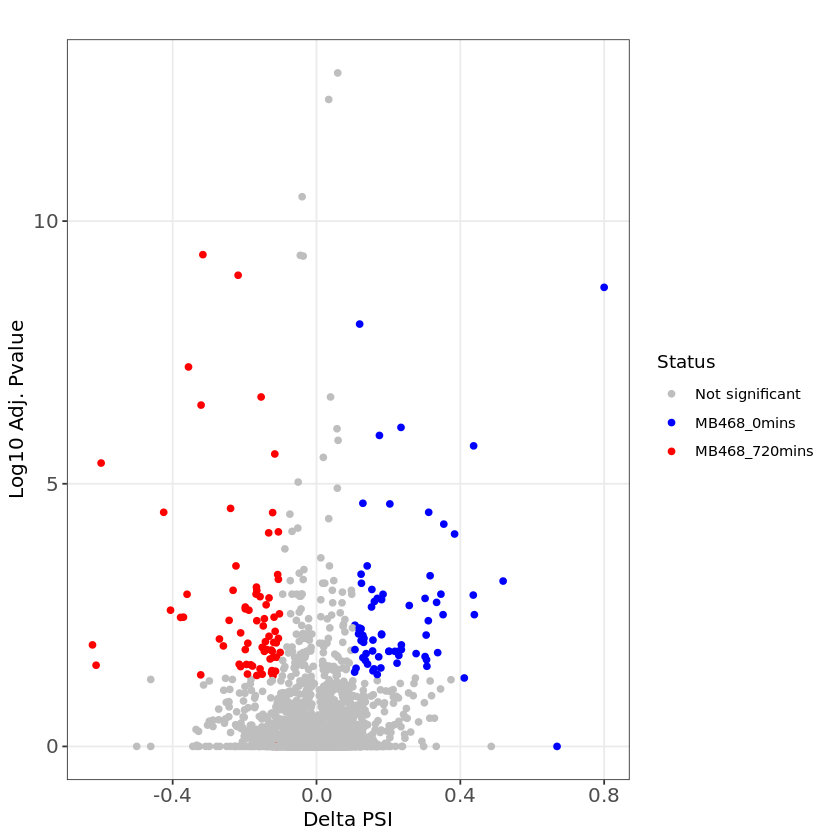

In [18]:
# type = refers to different splicing events
volcano(Met_filt, fdr = 0.05, deltaPSI = 0.1, type = "RI")
volcano(Met_filt, fdr = 0.05, deltaPSI = 0.1, type = "MXE")
volcano(Met_filt, fdr = 0.05, deltaPSI = 0.1, type = "A5SS")
volcano(Met_filt, fdr = 0.05, deltaPSI = 0.1, type = "A3SS")

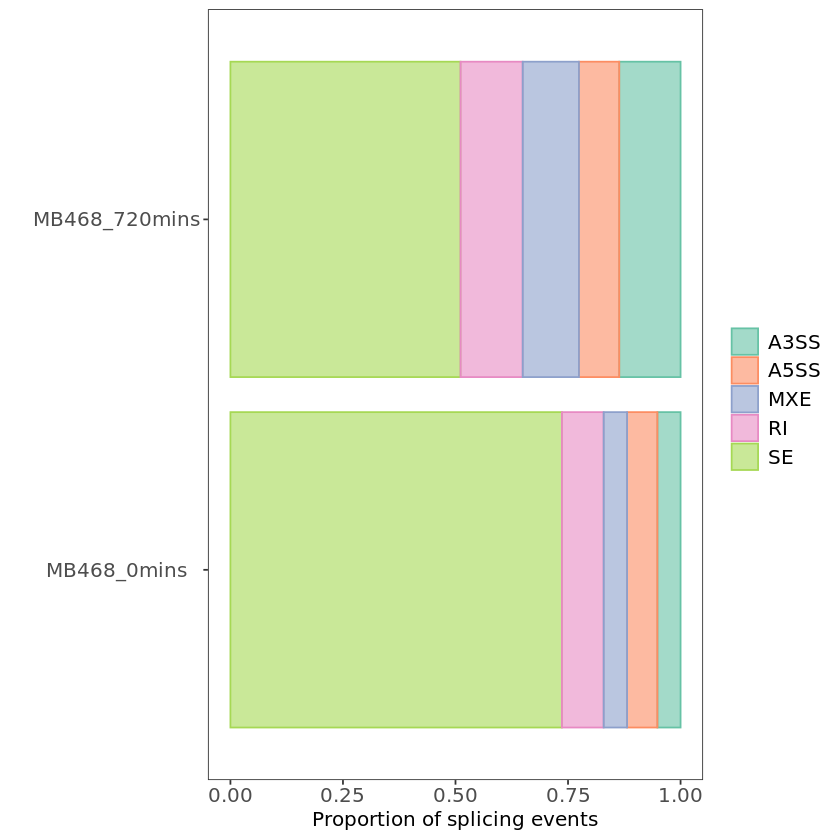

In [19]:
#The breakdown of splicing types can be plotted using splicingDistribution() and desired significance thresholds. Please refer to help pages for examples on how to use these functions.
splicingDistribution(Met_filt, fdr = 0.05, deltaPSI = 0.1)

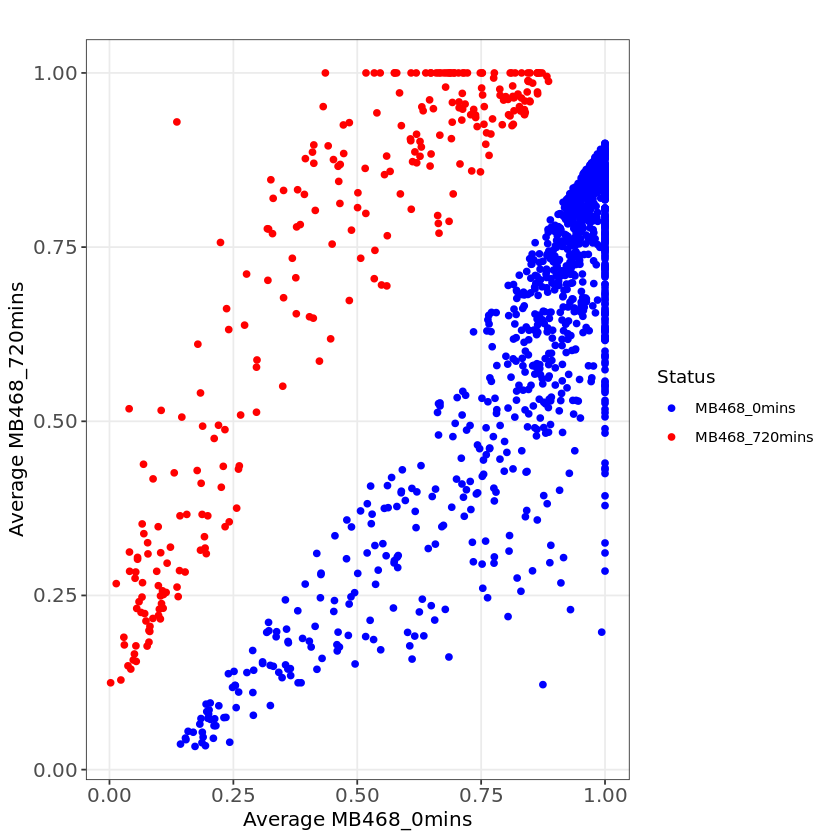

In [20]:
#dotplot visualization
dotplot(Met_top, type = "SE")
####